In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


In [9]:
raw_link = pd.read_csv('../Data/postgenerate_gpt.csv')

In [23]:
raw_link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717 entries, 0 to 3716
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   link             3717 non-null   object
 1   phanLoai         3717 non-null   object
 2   boNganh          3717 non-null   object
 3   cauHoi           3717 non-null   object
 4   cauTraLoi        3717 non-null   object
 5   TTHCLienQuan     3717 non-null   object
 6   cauHoiLienQuan   3717 non-null   object
 7   cauTraLoiAoGiac  3717 non-null   object
 8   pattern          3717 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 261.5+ KB


In [22]:
raw_link.boNganh.value_counts()

boNganh
Bộ Nông nghiệp và Môi trường              587
Bộ Giao thông vận tải                     450
Bộ Khoa học và Công nghệ ( Bộ TTTT cũ)    404
Bộ Tư pháp                                369
Bộ Công an                                340
Bộ Quốc phòng                             310
Bộ Ngoại giao                             278
Bộ Y tế                                   263
Bộ Nội vụ                                 208
Bộ Tài chính                              146
Thanh tra Chính phủ                       130
Bộ Tài nguyên và Môi trường               124
Bộ Công thương                             63
Bộ Lao động - Thương binh và Xã hội        45
Name: count, dtype: int64

In [10]:
raw_evaluate = {}

In [11]:
def castString(s):
    s = s.strip().lower()
        
    position1 = s.find('có')
    position2 = s.find('không')

    if position1 != -1 and position2 != -1:
        if position1 <= position2:
            return 'có'
        else:
            return 'không'
        
    if 'có' in s:
        return 'có'
    if 'không' in s:
        return 'không'
    
    if "yes" in s:
        return "có"
    if "no" in s:
        return "không"
    
    return 'không'

In [12]:
def demoPlot(df, name):
    TP = df[df['danhGiaDung']=='không'].shape[0]
    FP = df[df['danhGiaDung']=='có'].shape[0]
    TN = df[df['danhGiaAoGiac']=='có'].shape[0]
    FN = df[df['danhGiaAoGiac']=='không'].shape[0]

    conf_matrix = np.array([[TP, FP],
                            [FN, TN]])

    # Metrics calculation
    accuracy = (TP + TN) / conf_matrix.sum()
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    fig, ax = plt.subplots(figsize=(6, 6))

    # Define stable colors for each cell
    colors = np.array([["#4CAF50",  # TP - green
                        "#F44336"], # FP - red
                    ["#FF9800",  # FN - orange
                        "#2196F3"]]) # TN - blue

    for i in range(2):
        for j in range(2):
            # Draw colored rectangle for each cell
            ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=colors[i, j], alpha=0.7))
            # Put the value on top of colored cell
            ax.text(j, i, str(conf_matrix[i, j]), va='center', ha='center', color='white', fontsize=16, fontweight='bold')

    # Set axis tick labels
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(["Positive", "Negative"], fontsize=12)
    ax.set_yticklabels(["Positive", "Negative"], fontsize=12)

    # Set axis titles
    ax.set_xlabel("True Class", fontsize=14)
    ax.set_ylabel("Predicted Class", fontsize=14)

    # Add grid lines between cells
    ax.set_xticks(np.arange(-0.5, 2, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 2, 1), minor=True)
    ax.grid(which='minor', color='white', linestyle='-', linewidth=2)

    # Hide minor tick marks
    ax.tick_params(which='minor', bottom=False, left=False)

    # Title
    plt.title(name, fontsize=16, pad=20)

    # Display metrics below the plot
    metrics_text = (f"Accuracy: {accuracy:.4f}    "
                    f"Precision: {precision:.4f}    "
                    f"Recall: {recall:.4f}    "
                    f"F1 Score: {f1_score:.4f}")
    plt.figtext(0.5, 0.01, metrics_text, ha='center', fontsize=14, fontweight='bold')

    plt.tight_layout(rect=[0, 0.03, 1, 1])  # leave space for figtext
    plt.show()

    display(TP, FP, FN, TN)

In [13]:
def castCSV(path, model_name, name):
    filePath = path + model_name + "_evaluate"

    raw_evaluate[model_name] = pd.read_csv(f'{filePath}.csv')

    display((raw_evaluate[model_name].link == raw_link.link).sum() - raw_link.shape[0])

#     display(raw_evaluate[model_name].danhGiaDung.value_counts().keys().tolist(), 
#             raw_evaluate[model_name].danhGiaAoGiac.value_counts().keys().tolist())

    raw_evaluate[model_name]['danhGiaDung'] = raw_evaluate[model_name]['danhGiaDung'].apply(castString)
    raw_evaluate[model_name]['danhGiaAoGiac'] = raw_evaluate[model_name]['danhGiaAoGiac'].apply(castString)
    display(raw_evaluate[model_name]['danhGiaDung'].value_counts(),
            raw_evaluate[model_name]['danhGiaAoGiac'].value_counts())
    
    demoPlot(raw_evaluate[model_name], name)

np.int64(0)

danhGiaDung
có       2601
không    1116
Name: count, dtype: int64

danhGiaAoGiac
có       2829
không     888
Name: count, dtype: int64

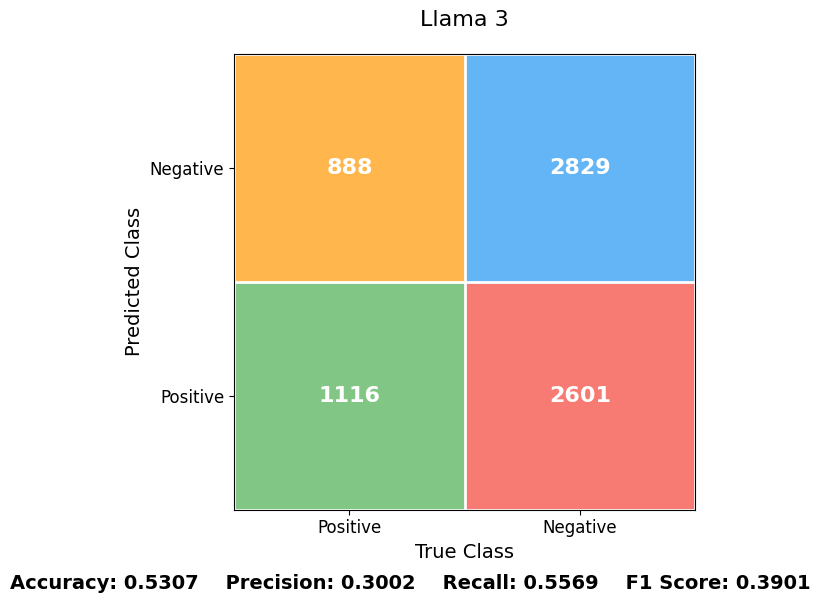

1116

2601

888

2829

In [14]:
path = "General_support/"

model_name = "llama-3-7b"

name = "Llama 3"

castCSV(path, model_name, name)

np.int64(0)

danhGiaDung
không    1919
có       1798
Name: count, dtype: int64

danhGiaAoGiac
không    2050
có       1667
Name: count, dtype: int64

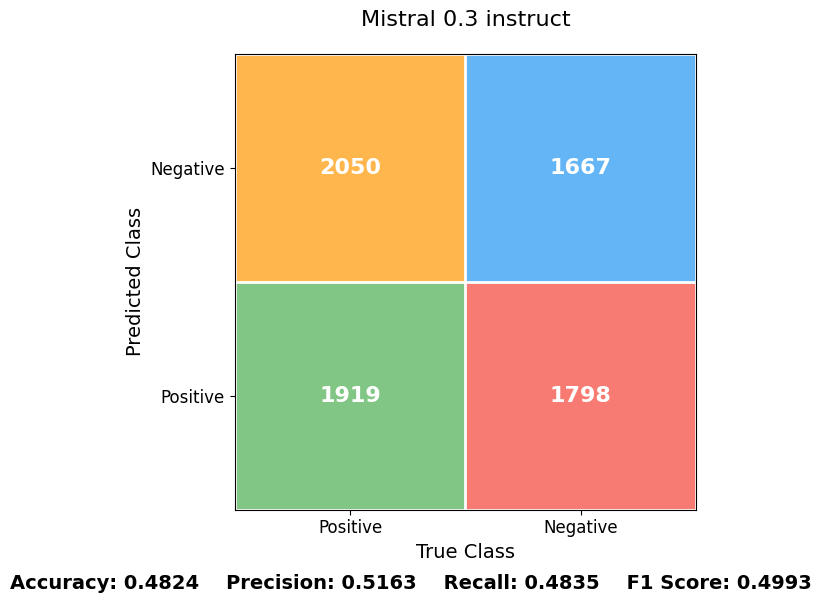

1919

1798

2050

1667

In [15]:
path = "General_support/"

model_name = "mistral-7b-instruct-v0.3"

name = "Mistral 0.3 instruct"

castCSV(path, model_name, name)

np.int64(0)

danhGiaDung
có       3168
không     549
Name: count, dtype: int64

danhGiaAoGiac
có       3310
không     407
Name: count, dtype: int64

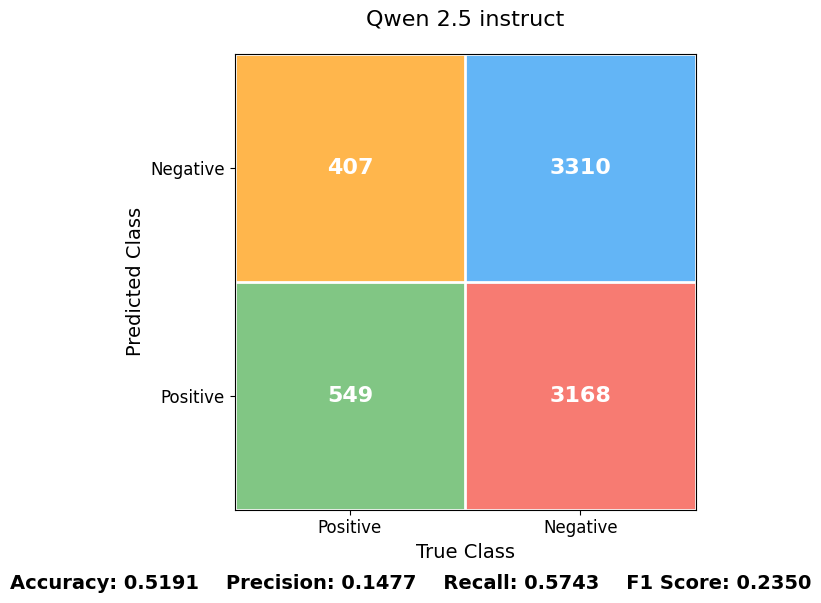

549

3168

407

3310

In [16]:
path = "General_support/"

model_name = "qwen2.5-7b-instruct-1m"

name = "Qwen 2.5 instruct"

castCSV(path, model_name, name)

np.int64(0)

danhGiaDung
có       3661
không      56
Name: count, dtype: int64

danhGiaAoGiac
có       3705
không      12
Name: count, dtype: int64

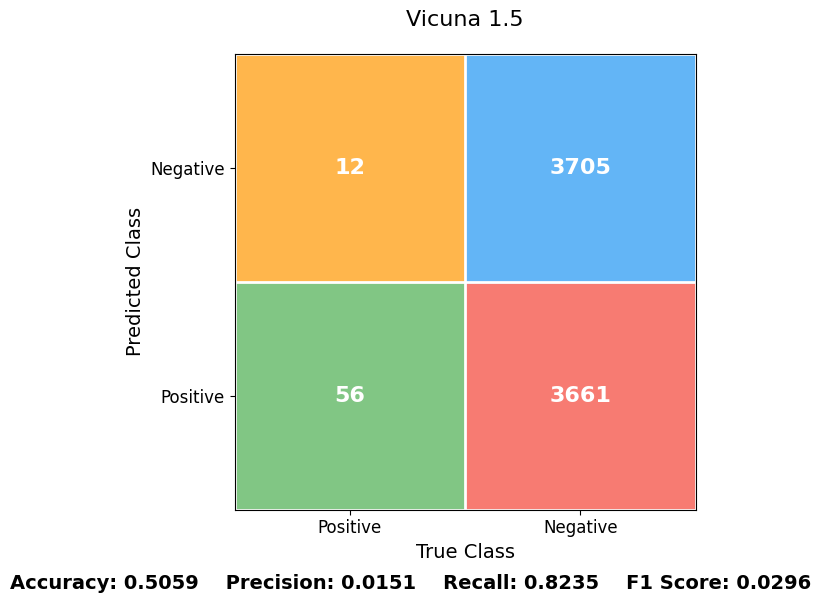

56

3661

12

3705

In [17]:
path = "General_support/"

model_name = "vicuna-7b-v1.5"

name = "Vicuna 1.5"

castCSV(path, model_name, name)

np.int64(0)

danhGiaDung
có       2533
không    1184
Name: count, dtype: int64

danhGiaAoGiac
có       2816
không     901
Name: count, dtype: int64

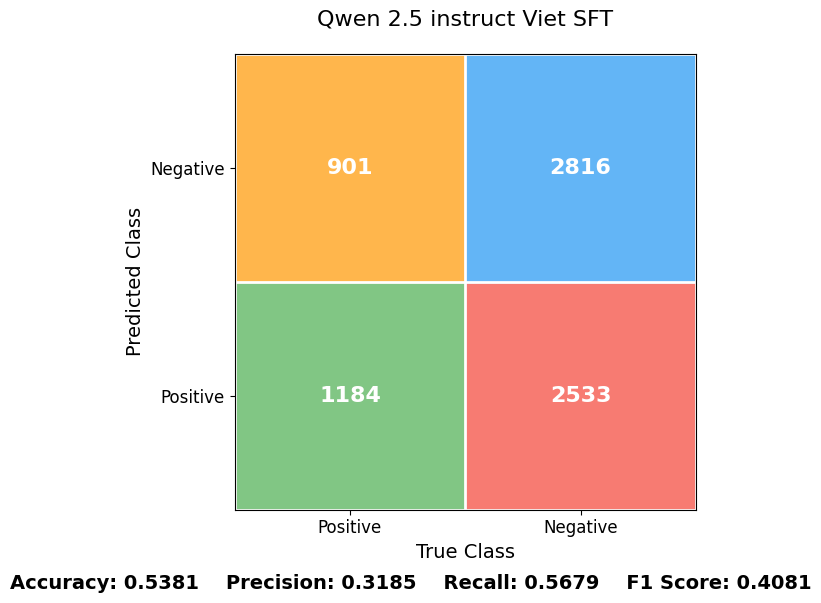

1184

2533

901

2816

In [18]:
path = "Vietnamese_support/"

model_name = "qwen2.5-7b-instruct-viet-sft"

name = "Qwen 2.5 instruct Viet SFT"

castCSV(path, model_name, name)

np.int64(0)

danhGiaDung
không    3537
có        180
Name: count, dtype: int64

danhGiaAoGiac
không    3469
có        248
Name: count, dtype: int64

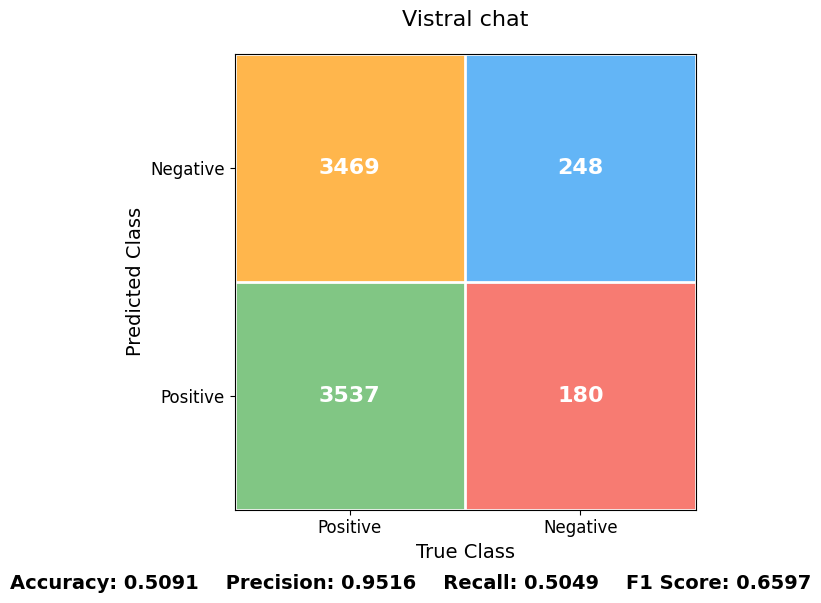

3537

180

3469

248

In [19]:
path = "Vietnamese_support/"

model_name = "vistral-7b-chat"

name = "Vistral chat"

castCSV(path, model_name, name)

np.int64(0)

danhGiaDung
không    2618
có       1099
Name: count, dtype: int64

danhGiaAoGiac
không    2052
có       1665
Name: count, dtype: int64

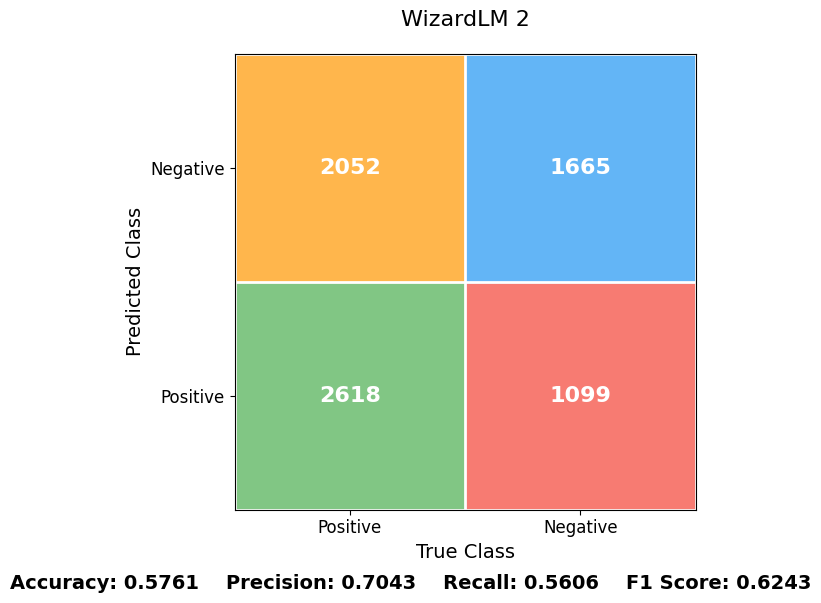

2618

1099

2052

1665

In [20]:
path = "General_support/"

model_name = "wizardlm-2-7b"

name = "WizardLM 2"

castCSV(path, model_name, name)
